In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, quantile_transform
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_absolute_error, r2_score
import statsmodels.api as sm

In [3]:
df = pd.read_csv('/Users/mikeredshaw/Documents/Schulich MBAN/MBAN 6110 - Data Science/Assignment 3/kc_house_data.csv')

I first want to do some preliminary analysis on the data to see what needs to be done.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

I'm going to drop any potential duplicates.

In [5]:
df.drop_duplicates()

id             date     price  bedrooms  bathrooms   
0      7129300520  20141013T000000  221900.0         3       1.00  \
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade   
0             1180      5650     1.0           0     0  ...      7  \
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat   
0            1180              0      1955             0    98178  47.5112  \
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [6]:
df.describe(include='all')

id             date         price      bedrooms   
count   2.161300e+04            21613  2.161300e+04  21613.000000  \
unique           NaN              372           NaN           NaN   
top              NaN  20140623T000000           NaN           NaN   
freq             NaN              142           NaN           NaN   
mean    4.580302e+09              NaN  5.400881e+05      3.370842   
std     2.876566e+09              NaN  3.671272e+05      0.930062   
min     1.000102e+06              NaN  7.500000e+04      0.000000   
25%     2.123049e+09              NaN  3.219500e+05      3.000000   
50%     3.904930e+09              NaN  4.500000e+05      3.000000   
75%     7.308900e+09              NaN  6.450000e+05      4.000000   
max     9.900000e+09              NaN  7.700000e+06     33.000000   

           bathrooms   sqft_living      sqft_lot        floors    waterfront   
count   21613.000000  21613.000000  2.161300e+04  21613.000000  21613.000000  \
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        2.114757   2079.899736  1.510697e+04      1.494309      0.007542   
std         0.770163    918.440897  4.142051e+04      0.539989      0.086517   
min         0.000000    290.000000  5.200000e+02      1.000000      0.000000   
25%         1.750000   1427.000000  5.040000e+03      1.000000      0.000000   
50%         2.250000   1910.000000  7.618000e+03      1.500000      0.000000   
75%         2.500000   2550.000000  1.068800e+04      2.000000      0.000000   
max         8.000000  13540.000000  1.651359e+06      3.500000      1.000000   

                view  ...         grade    sqft_above  sqft_basement   
count   21613.000000  ...  21613.000000  21613.000000   21613.000000  \
unique           NaN  ...           NaN           NaN            NaN   
top              NaN  ...           NaN           NaN            NaN   
freq             NaN  ...           NaN           NaN            NaN   
mean        0.234303  ...      7.656873   1788.390691     291.509045   
std         0.766318  ...      1.175459    828.090978     442.575043   
min         0.000000  ...      1.000000    290.000000       0.000000   
25%         0.000000  ...      7.000000   1190.000000       0.000000   
50%         0.000000  ...      7.000000   1560.000000       0.000000   
75%         0.000000  ...      8.000000   2210.000000     560.000000   
max         4.000000  ...     13.000000   9410.000000    4820.000000   

            yr_built  yr_renovated       zipcode           lat          long   
count   21613.000000  21613.000000  21613.000000  21613.000000  21613.000000  \
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean     1971.005136     84.402258  98077.939805     47.560053   -122.213896   
std        29.373411    401.679240     53.505026      0.138564      0.140828   
min      1900.000000      0.000000  98001.000000     47.155900   -122.519000   
25%      1951.000000      0.000000  98033.000000     47.471000   -122.328000   
50%      1975.000000      0.000000  98065.000000     47.571800   -122.230000   
75%      1997.000000      0.000000  98118.000000     47.678000   -122.125000   
max      2015.000000   2015.000000  98199.000000     47.777600   -121.315000   

        sqft_living15     sqft_lot15  
count    21613.000000   21613.000000  
unique            NaN            NaN  
top               NaN            NaN  
freq              NaN            NaN  
mean      1986.552492   12768.455652  
std        685.391304   27304.179631  
min        399.000000     651.000000  
25%       1490.000000    5100.000000  
50%       1840.000000    7620.000000  
75%       23

In [7]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

I see that the date column is not the proper datetime type. I will convert it then extract date values to see if that helps the analysis.

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [13]:
df.dtypes

id                        int64
date             datetime64[ns]
sale_month                int32
sale_year                 int32
sale_day                  int32
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [12]:
df.insert(2, 'sale_month', df['date'].dt.month)
df.insert(3, 'sale_year', df['date'].dt.year)
df.insert(4, 'sale_day', df['date'].dt.day)

I want to review all the columns in the dataset to review if there are any outliers that need to be dealt with. To do this quickly, I'll simply pass through the column names in a loop creating all the boxplots.

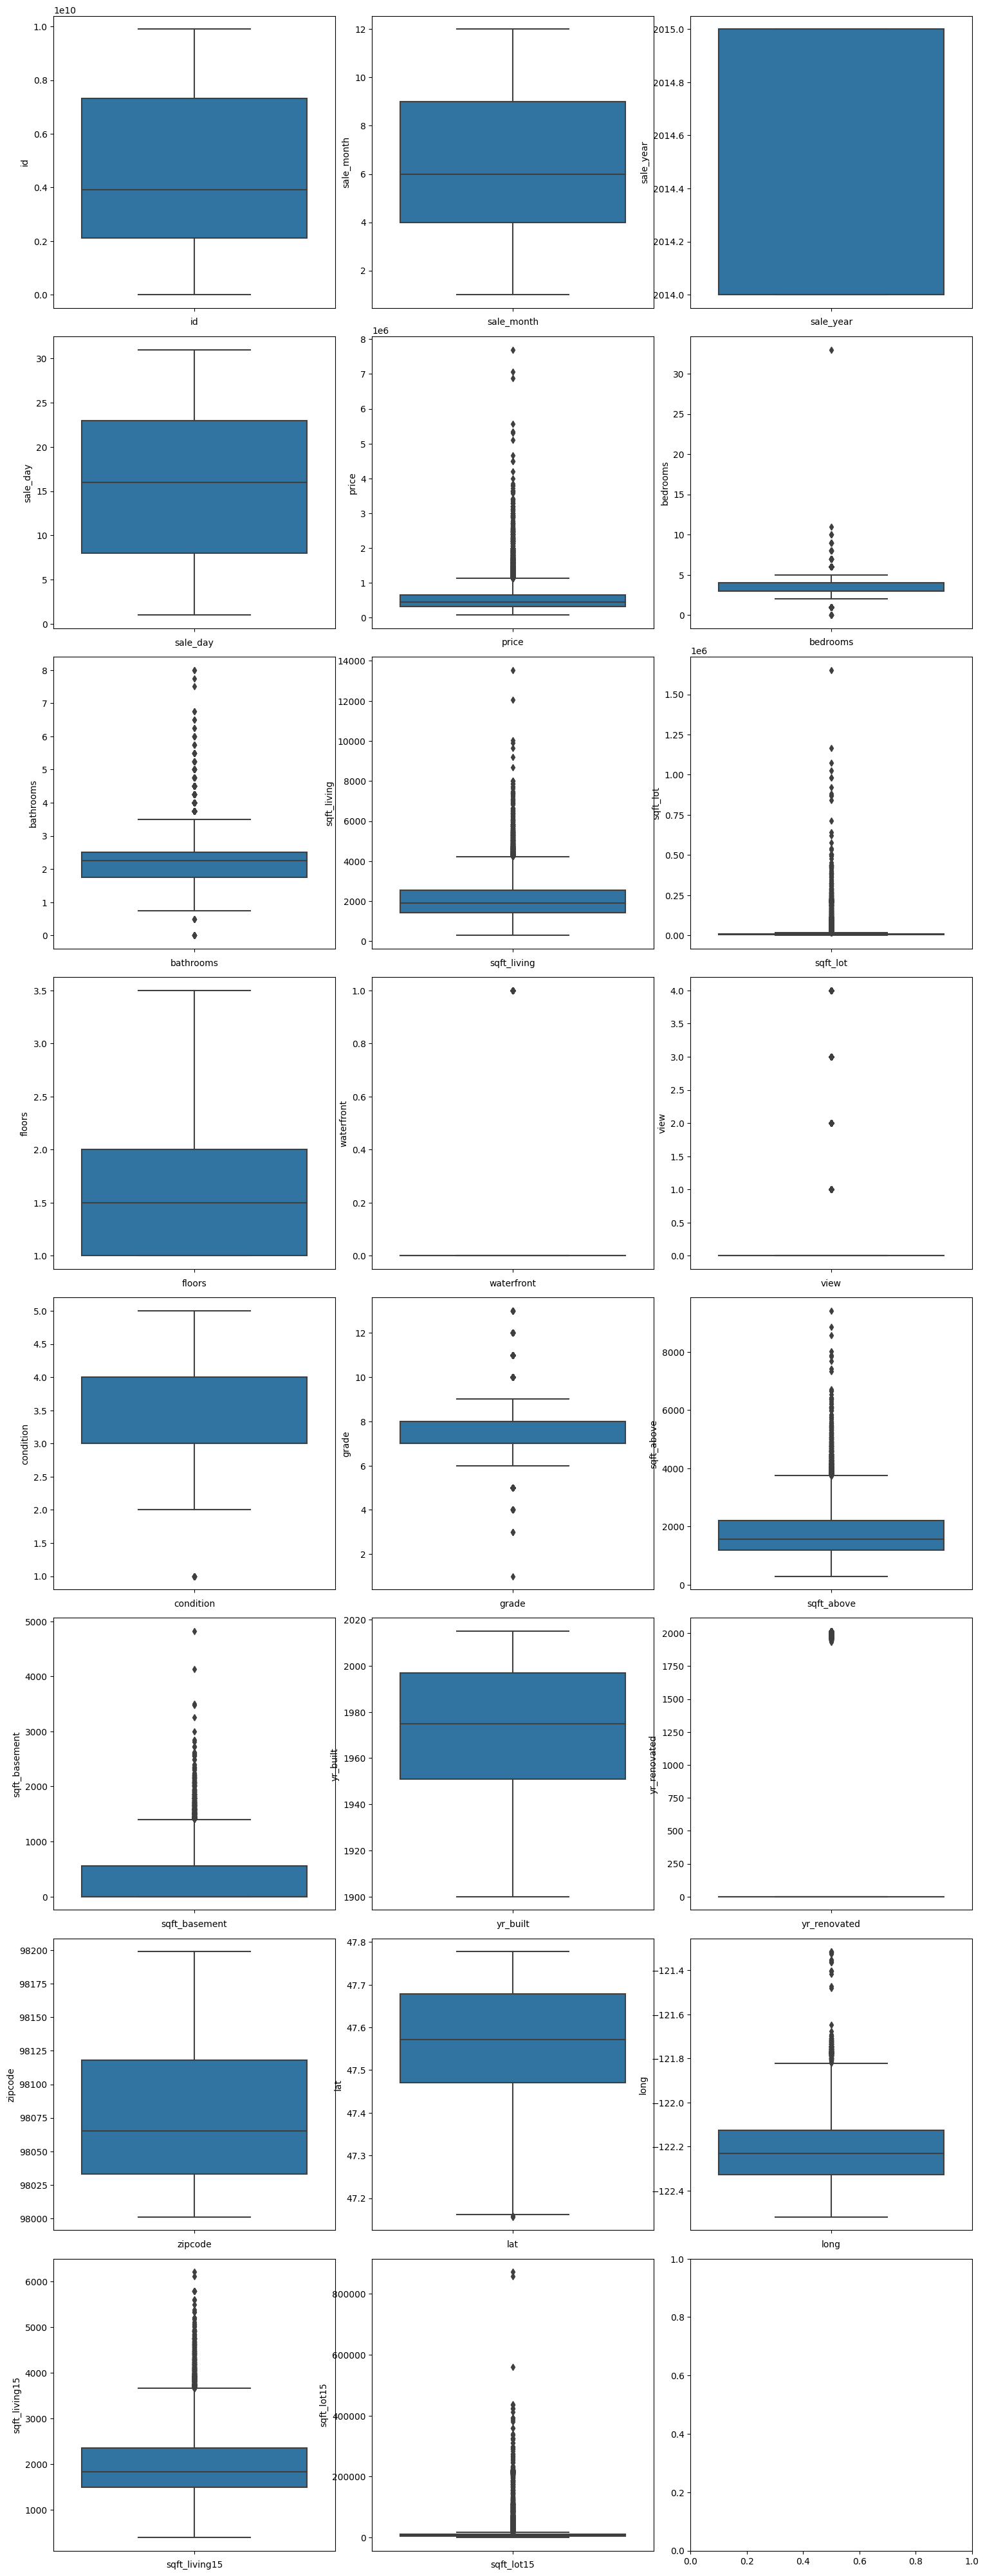

In [9]:
columns = df.columns.drop(['date'])
num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout()

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.boxplot(data=df, y=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel(column)
plt.show()

We can see there is lots of upper end outliers for many of the variables; namely price and sqft data. I want to review the distribution of the variables as well, so I will do the same thing as before and pass all the columns through into a histplot.

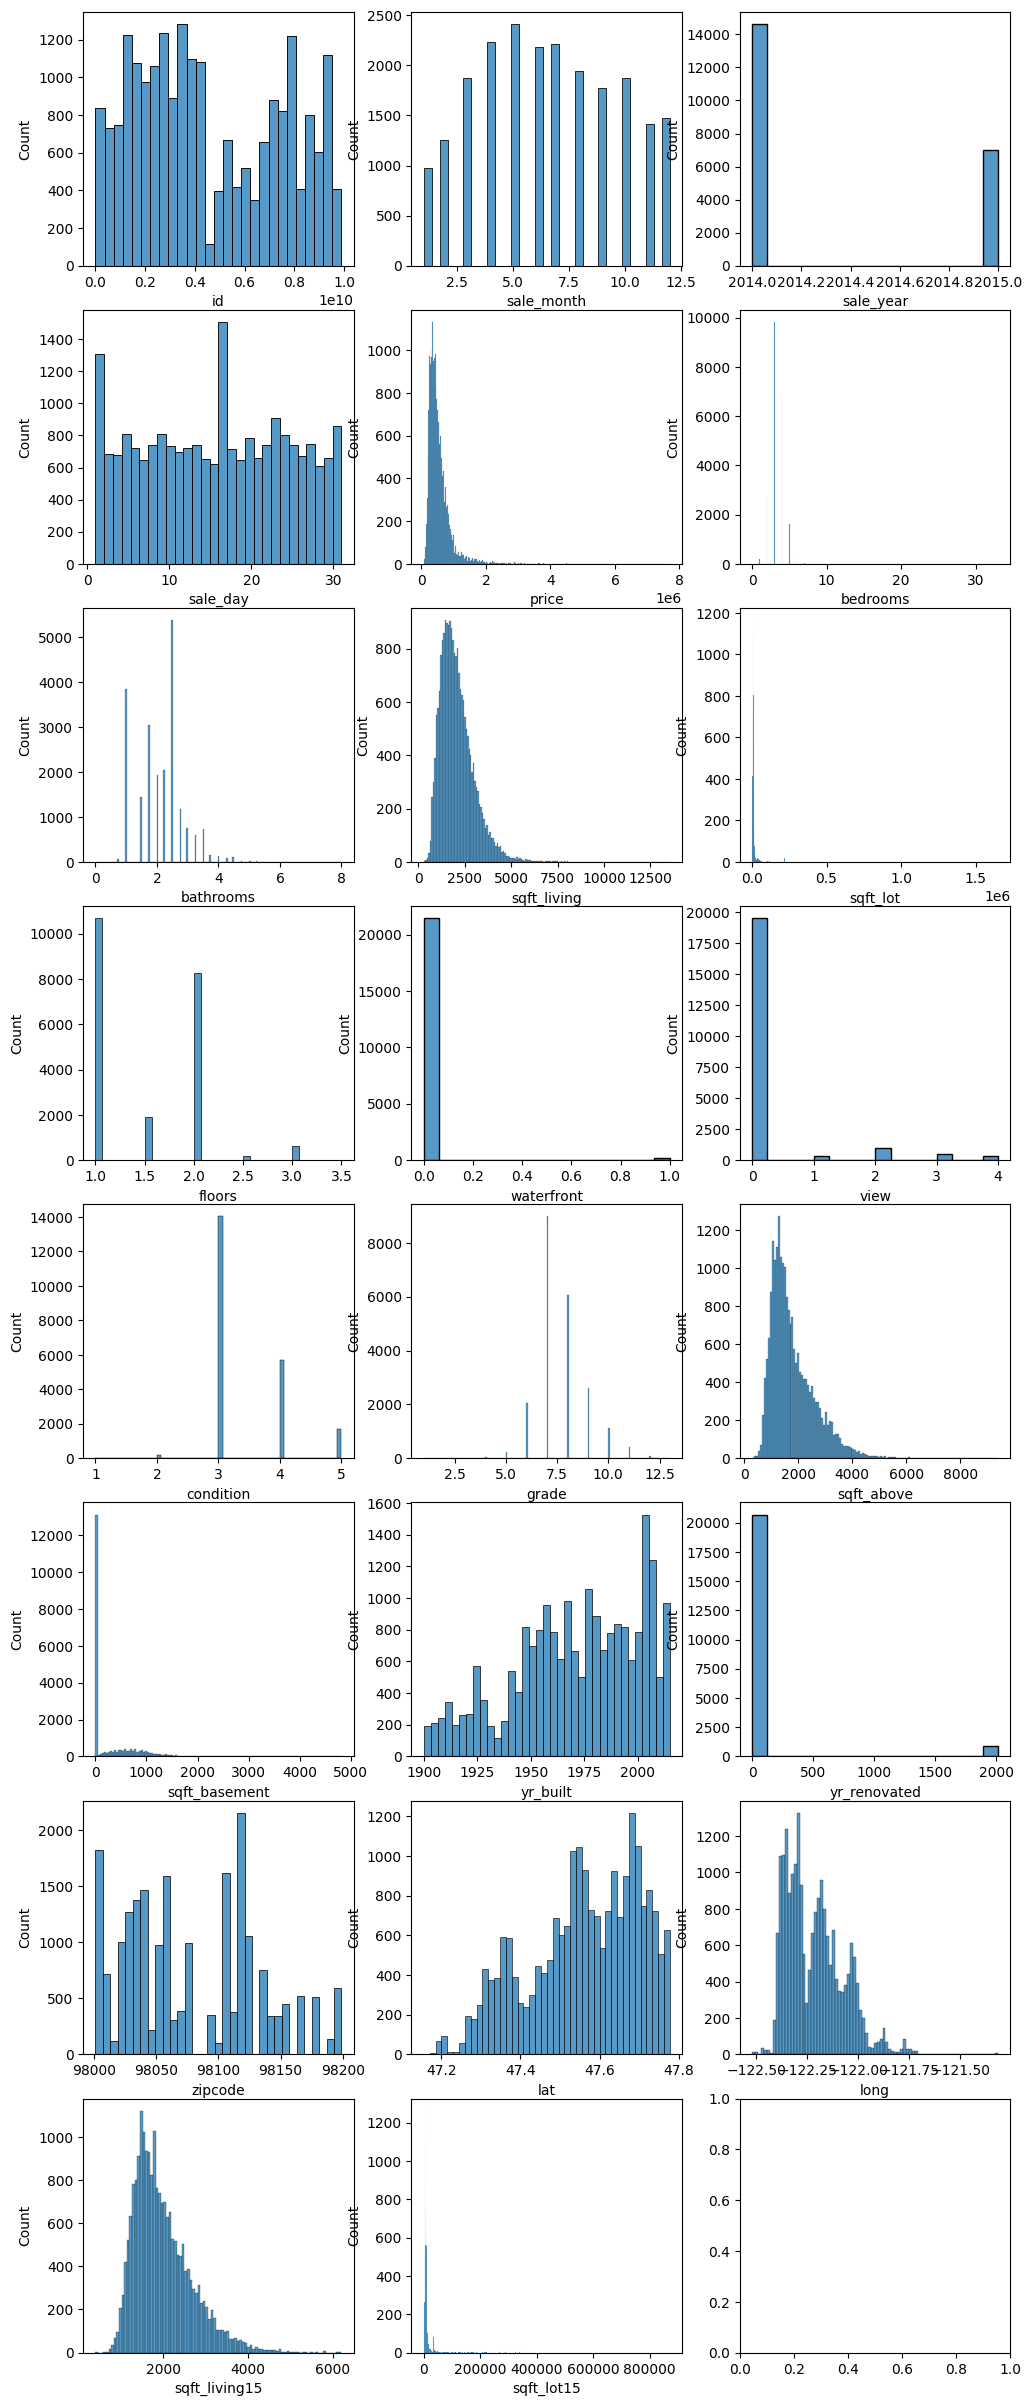

In [10]:
num_plots = len(columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))
fig.tight_layout()

for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.histplot(data=df, x=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.show()

Not suprisingly, the same variables are heavily right skewed, demonstrating many outliers on the upper end of the values. I also notice there is one weirdly high value for bedrooms, and some points that include 0 bathrooms. I want to review these entries as it doesn't seem right.

In [11]:
print(df[df['bedrooms'] > 30])
print(df[df['bathrooms'] == 0])

               id       date  sale_month  sale_year  sale_day     price   
15870  2402100895 2014-06-25           6       2014        25  640000.0  \

       bedrooms  bathrooms  sqft_living  sqft_lot  ...  grade  sqft_above   
15870        33       1.75         1620      6000  ...      7        1040  \

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long   
15870            580      1947             0    98103  47.6878 -122.331  \

       sqft_living15  sqft_lot15  
15870           1330        4700  

[1 rows x 24 columns]
               id       date  sale_month  sale_year  sale_day      price   
875    6306400140 2014-06-12           6       2014        12  1095000.0  \
1149   3421079032 2015-02-17           2       2015        17    75000.0   
3119   3918400017 2015-02-05           2       2015         5   380000.0   
5832   5702500050 2014-11-04          11       2014         4   280000.0   
6994   2954400190 2014-06-24           6       2014        24  1295650

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   sale_month     21613 non-null  int32         
 3   sale_year      21613 non-null  int32         
 4   sale_day       21613 non-null  int32         
 5   price          21613 non-null  float64       
 6   bedrooms       21613 non-null  int64         
 7   bathrooms      21613 non-null  float64       
 8   sqft_living    21613 non-null  int64         
 9   sqft_lot       21613 non-null  int64         
 10  floors         21613 non-null  float64       
 11  waterfront     21613 non-null  int64         
 12  view           21613 non-null  int64         
 13  condition      21613 non-null  int64         
 14  grade          21613 non-null  int64         
 15  sqft_above     2161

These only make up 10 entries, so I will remove these outliers.

In [13]:
df= df[df['bathrooms'] != 0]
df=df[df['bedrooms'] != 33]

I'm going to start tackling the other heavily skewed variables with many high end outliers. We know regression models work better with normally distributed data, so I will look to improve their distribution using z_score to determine outliers and remove them. 

In [14]:
z_scores = stats.zscore(df['price'])
outliers_mask = np.abs(z_scores) > 3.5
outliers = df[outliers_mask]
print(outliers)

               id       date  sale_month  sale_year  sale_day      price   
21     2524049179 2014-08-26           8       2014        26  2000000.0  \
153    7855801670 2015-04-01           4       2015         1  2250000.0   
246    2025069065 2014-09-29           9       2014        29  2400000.0   
269    7960900060 2015-05-04           5       2015         4  2900000.0   
282    7424700045 2015-05-13           5       2015        13  2050000.0   
...           ...        ...         ...        ...       ...        ...   
21506  2524069097 2014-05-09           5       2014         9  2238890.0   
21514  3262300818 2015-02-27           2       2015        27  1865000.0   
21530  8964800330 2015-04-07           4       2015         7  3000000.0   
21540   715010530 2015-01-13           1       2015        13  1881580.0   
21576  9253900271 2015-01-07           1       2015         7  3567000.0   

       bedrooms  bathrooms  sqft_living  sqft_lot  ...  grade  sqft_above   
21        

I don't want to shrink the range of price data too much here. Since price is our target variable, I want it to be able to work with as wide of range of data as feasible without giving up too much on the models accuracy. Through trial and error, I've found that removing price outliers with a z_score of 3.5 is a good balance between removing extremes and maintaining a good range of price points.

In [15]:
df = df[~outliers_mask]

I will carry out similar outlier handling with the remaining skewed variables, with a more aggressive z-score.

In [16]:
z_scores = stats.zscore(df['sqft_living'])
outliers_mask = np.abs(z_scores) > 3
outliers = df[outliers_mask]
print(outliers)

               id       date  sale_month  sale_year  sale_day      price   
5      7237550310 2014-05-12           5       2014        12  1225000.0  \
70     1525059190 2014-09-12           9       2014        12  1040000.0   
270    4054500390 2014-10-07          10       2014         7  1365000.0   
384     713500030 2014-07-28           7       2014        28  1350000.0   
419    8678500060 2014-07-10           7       2014        10  1550000.0   
...           ...        ...         ...        ...       ...        ...   
21344  8835770170 2014-08-22           8       2014        22  1488000.0   
21486    98300230 2015-04-28           4       2015        28  1459000.0   
21520  7237550100 2014-08-25           8       2014        25  1408760.0   
21521  7430500110 2014-12-09          12       2014         9  1378000.0   
21590  7430200100 2014-05-14           5       2014        14  1222500.0   

       bedrooms  bathrooms  sqft_living  sqft_lot  ...  grade  sqft_above   
5         

In [17]:
df = df[~outliers_mask]

In [18]:
z_scores = stats.zscore(df['sqft_above'])
outliers_mask = np.abs(z_scores) > 3
outliers = df[outliers_mask]
print(outliers)

               id       date  sale_month  sale_year  sale_day      price   
431    2944010240 2014-09-08           9       2014         8   988000.0  \
509    3885805665 2014-06-12           6       2014        12  1485000.0   
512    7322910030 2014-07-21           7       2014        21  1095000.0   
563    2725069050 2014-06-13           6       2014        13   863000.0   
679    7852070060 2014-07-31           7       2014        31  1145000.0   
...           ...        ...         ...        ...       ...        ...   
21551  1561750040 2014-12-24          12       2014        24  1375000.0   
21561  6664500090 2015-01-15           1       2015        15   750000.0   
21593  8672200110 2015-03-17           3       2015        17  1088000.0   
21599  7202300110 2014-09-15           9       2014        15   810000.0   
21600   249000205 2014-10-15          10       2014        15  1537000.0   

       bedrooms  bathrooms  sqft_living  sqft_lot  ...  grade  sqft_above   
431       

In [19]:
df = df[~outliers_mask]

In [20]:
z_scores = stats.zscore(df['sqft_living15'])
outliers_mask = np.abs(z_scores) > 3
outliers = df[outliers_mask]
print(outliers)

               id       date  sale_month  sale_year  sale_day      price   
216      46100204 2015-02-21           2       2015        21  1505000.0  \
283    7202360350 2014-06-30           6       2014        30   780000.0   
313    4139480200 2014-06-18           6       2014        18  1384000.0   
314    4139480200 2014-12-09          12       2014         9  1400000.0   
473    8651610890 2014-10-14          10       2014        14  1150000.0   
...           ...        ...         ...        ...       ...        ...   
21120  7853280250 2015-04-24           4       2015        24   820875.0   
21254  7852120050 2015-03-11           3       2015        11   729950.0   
21375  6061500100 2014-07-17           7       2014        17  1174660.0   
21524  6453550090 2015-05-05           5       2015         5   861111.0   
21548  8835770330 2014-08-19           8       2014        19  1057000.0   

       bedrooms  bathrooms  sqft_living  sqft_lot  ...  grade  sqft_above   
216       

In [21]:
df = df[~outliers_mask]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20763 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20763 non-null  int64         
 1   date           20763 non-null  datetime64[ns]
 2   sale_month     20763 non-null  int32         
 3   sale_year      20763 non-null  int32         
 4   sale_day       20763 non-null  int32         
 5   price          20763 non-null  float64       
 6   bedrooms       20763 non-null  int64         
 7   bathrooms      20763 non-null  float64       
 8   sqft_living    20763 non-null  int64         
 9   sqft_lot       20763 non-null  int64         
 10  floors         20763 non-null  float64       
 11  waterfront     20763 non-null  int64         
 12  view           20763 non-null  int64         
 13  condition      20763 non-null  int64         
 14  grade          20763 non-null  int64         
 15  sqft_above     20763 non

I want to review the distribution again to see how it improved.

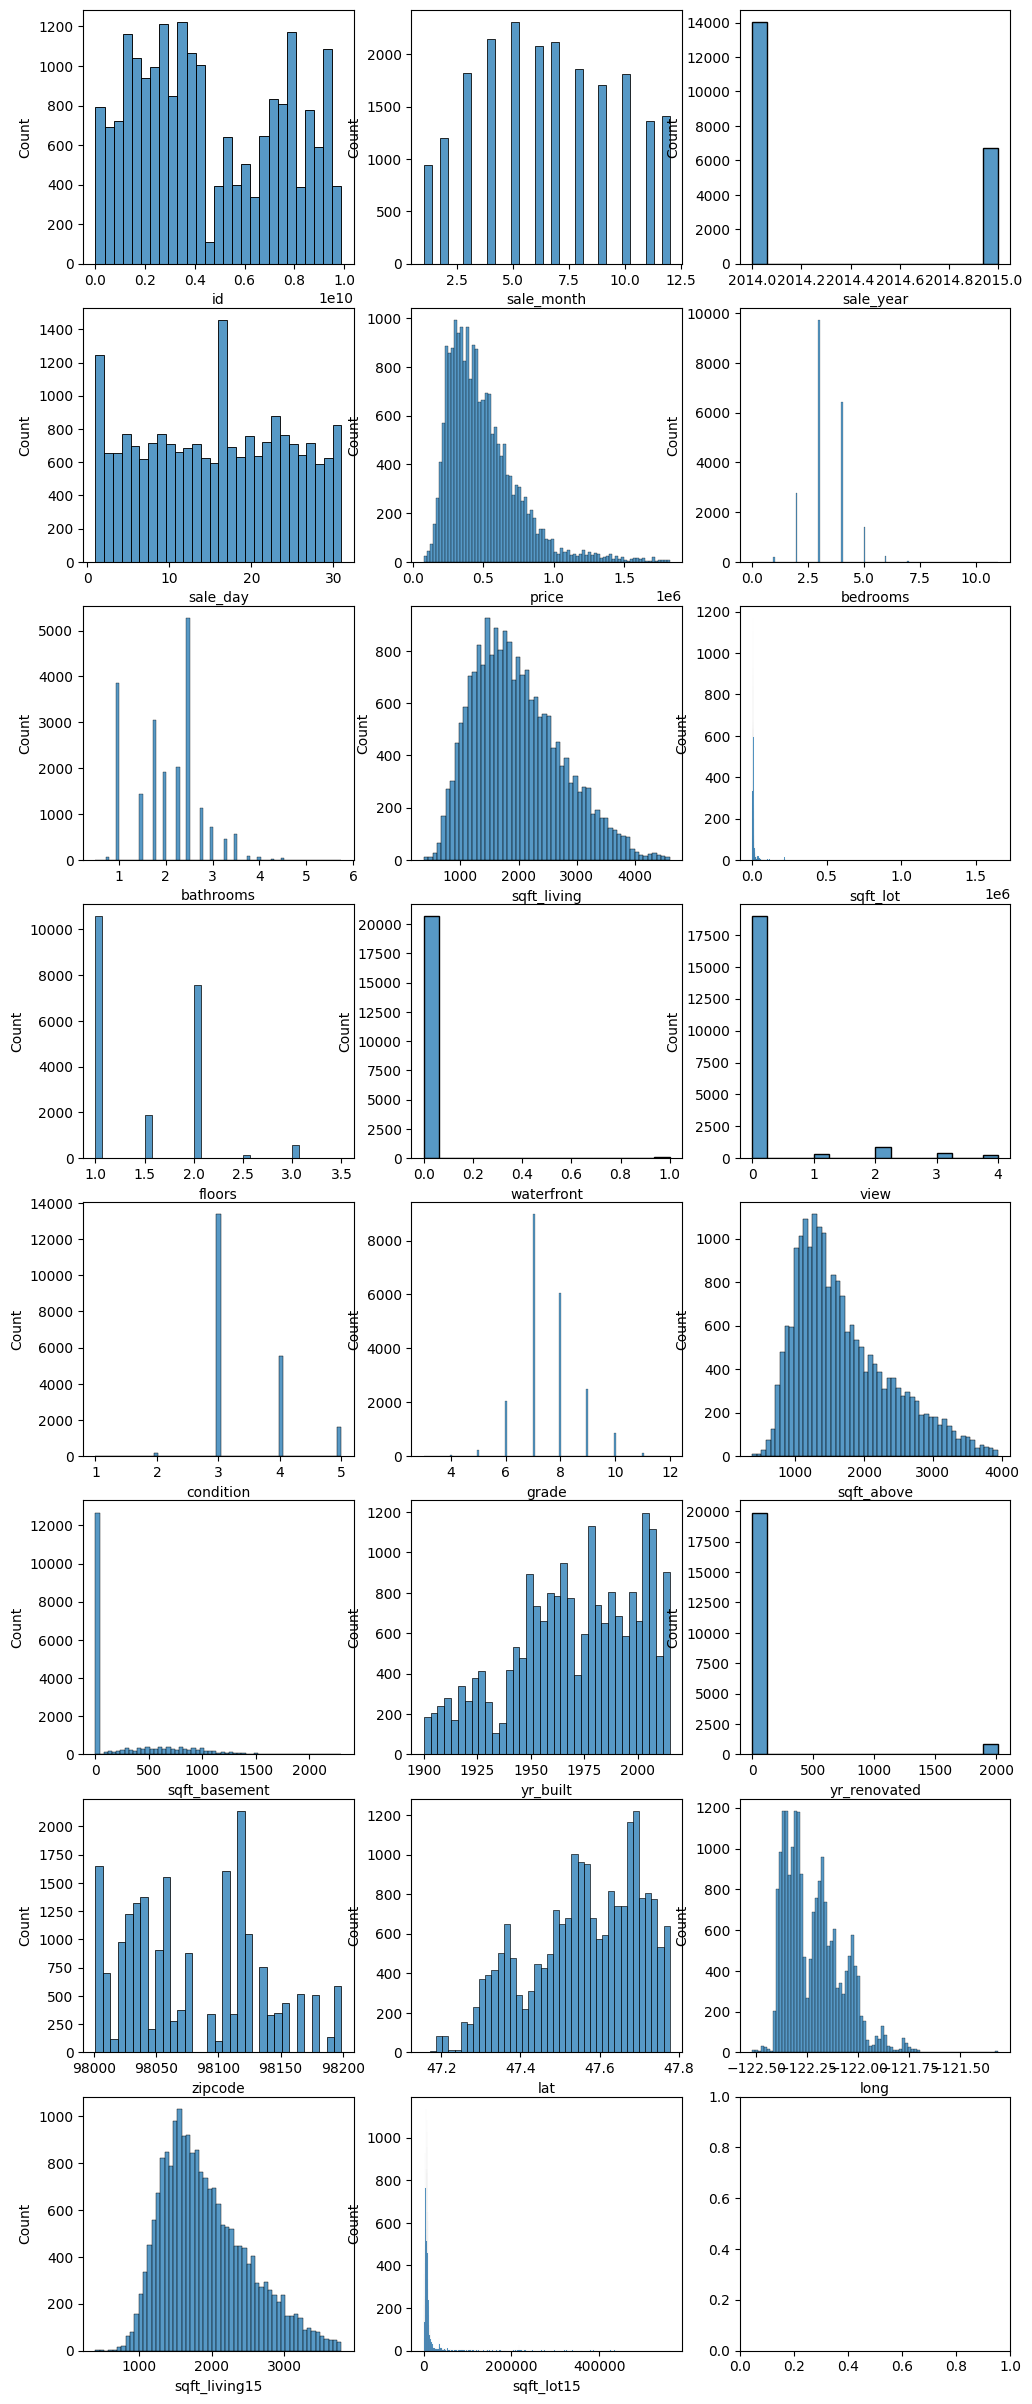

In [23]:
num_plots = len(columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))
fig.tight_layout()

for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.histplot(data=df, x=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.show()

We can see removing the extreme outliers from the heavily skewed variables has helped significantly in their distribution, which should help the model.

In [24]:
lost_data = 1-(20763/21613)
print(lost_data)

0.03932818211261746


We only removed 4% of data which is acceptable. We can continue.

I want to now review the correlation coeffecient between price and every variable in the table.

In [25]:
correlations = [(column, df[column].corr(df['price'])) for column in columns]
correlations_sorted = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)

for column, corr_coeff in correlations_sorted:
    print(f"Correlation between {column} and price: {corr_coeff:.2f}")

Correlation between price and price: 1.00
Correlation between grade and price: 0.63
Correlation between sqft_living and price: 0.62
Correlation between sqft_living15 and price: 0.54
Correlation between sqft_above and price: 0.51
Correlation between bathrooms and price: 0.45
Correlation between lat and price: 0.39
Correlation between view and price: 0.32
Correlation between bedrooms and price: 0.29
Correlation between sqft_basement and price: 0.28
Correlation between floors and price: 0.25
Correlation between yr_renovated and price: 0.13
Correlation between waterfront and price: 0.13
Correlation between condition and price: 0.06
Correlation between sqft_lot and price: 0.06
Correlation between sqft_lot15 and price: 0.04
Correlation between sale_month and price: -0.02
Correlation between yr_built and price: 0.02
Correlation between sale_day and price: -0.01
Correlation between sale_year and price: 0.01
Correlation between zipcode and price: -0.01
Correlation between id and price: 0.00
Cor

I've though of some variables that may help in further analysis; some joining values of two other variables, some dummy variables, etc. NOTE: price per sqft CANNOT be used in the model. This is only being made in case it is useful in other analysis.

In [26]:
df['grade_value'] = (1+(df['grade'])) * df['sqft_living']
df['condition_value'] = ((1+(df['condition'])) * df['sqft_living'])
df['grade_condition_score'] = (1+(df['grade'])*(1+(df['condition'])))
df['price_per_sqft'] = df['price']/df['sqft_living']
df['renovated'] = np.where(df['yr_renovated'] == 0, 0, 1)
df['sqft_per_floor'] = df['sqft_living']/df['floors']
df['basement'] = np.where(df['sqft_basement'] == 0, 0, 1)

In [27]:
df['water_view_score'] = (1+(df['view'])) * (1+(df['waterfront']))

In [28]:
df.head()

id       date  sale_month  sale_year  sale_day     price  bedrooms   
0  7129300520 2014-10-13          10       2014        13  221900.0         3  \
1  6414100192 2014-12-09          12       2014         9  538000.0         3   
2  5631500400 2015-02-25           2       2015        25  180000.0         2   
3  2487200875 2014-12-09          12       2014         9  604000.0         4   
4  1954400510 2015-02-18           2       2015        18  510000.0         3   

   bathrooms  sqft_living  sqft_lot  ...  sqft_living15  sqft_lot15   
0       1.00         1180      5650  ...           1340        5650  \
1       2.25         2570      7242  ...           1690        7639   
2       1.00          770     10000  ...           2720        8062   
3       3.00         1960      5000  ...           1360        5000   
4       2.00         1680      8080  ...           1800        7503   

   grade_value  condition_value  grade_condition_score  price_per_sqft   
0         9440             4720                     29      188.050847  \
1        20560            10280                     29      209.338521   
2         5390             3080                     25      233.766234   
3        15680            11760                     43      308.163265   
4        15120             6720                     33      303.571429   

   renovated  sqft_per_floor  basement  water_view_score  
0          0          1180.0         0                 1  
1          1          1285.0         1                 1  
2          0           770.0         0                 1  
3          0          1960.0         1                 1  
4          0          1680.0         0                 1  

[5 rows x 32 columns]

I want to do some binning of some variables to see if levels rather than total values will be helpful in the analysis and modelling. 

In [29]:
num_bins = 4
bin_width = (df['grade_value'].max() - df['grade_value'].min()) / num_bins
bins = [df['grade_value'].min() + i * bin_width for i in range(num_bins+1)]
df['grade_value_level'] = pd.cut(df['grade_value'], bins=bins, labels=False, include_lowest=True)

In [30]:
df[df['grade_value_level']==0]

id       date  sale_month  sale_year  sale_day     price   
0      7129300520 2014-10-13          10       2014        13  221900.0  \
2      5631500400 2015-02-25           2       2015        25  180000.0   
6      1321400060 2014-06-27           6       2014        27  257500.0   
7      2008000270 2015-01-15           1       2015        15  291850.0   
8      2414600126 2015-04-15           4       2015        15  229500.0   
...           ...        ...         ...        ...       ...       ...   
21607  2997800021 2015-02-19           2       2015        19  475000.0   
21608   263000018 2014-05-21           5       2014        21  360000.0   
21610  1523300141 2014-06-23           6       2014        23  402101.0   
21611   291310100 2015-01-16           1       2015        16  400000.0   
21612  1523300157 2014-10-15          10       2014        15  325000.0   

       bedrooms  bathrooms  sqft_living  sqft_lot  ...  sqft_lot15   
0             3       1.00         1180      5650  ...        5650  \
2             2       1.00          770     10000  ...        8062   
6             3       2.25         1715      6819  ...        6819   
7             3       1.50         1060      9711  ...        9711   
8             3       1.00         1780      7470  ...        8113   
...         ...        ...          ...       ...  ...         ...   
21607         3       2.50         1310      1294  ...        1265   
21608         3       2.50         1530      1131  ...        1509   
21610         2       0.75         1020      1350  ...        2007   
21611         3       2.50         1600      2388  ...        1287   
21612         2       0.75         1020      1076  ...        1357   

       grade_value  condition_value  grade_condition_score  price_per_sqft   
0             9440             4720                     29      188.050847  \
2             5390             3080                     25      233.766234   
6            13720             6860                     29      150.145773   
7             8480             4240                     29      275.330189   
8            14240             7120                     29      128.932584   
...            ...              ...                    ...             ...   
21607        11790             5240                     33      362.595420   
21608        13770             6120                     33      235.294118   
21610         8160             4080                     29      394.216667   
21611        14400             6400                     33      250.000000   
21612         8160             4080                     29      318.627451   

       renovated  sqft_per_floor  basement  water_view_score   
0              0          1180.0         0                 1  \
2              0           770.0         0                 1   
6              0           857.5         0                 1   
7              0          1060.0         0                 1   
8              0          1780.0         1                 1   
...          ...             ...       ...               ...   
21607          0           655.0         1                 1   
21608          0           510.0         0                 1   
21610          0           510.0         0                 1   
21611          0           800.0         0                 1   
21612          0           510.0         0                 1   

       grade_value_level  
0                      0  
2                      0  
6                      0  
7                      0  
8                      0  
...                  ...  
21607                  0  
21608                  0  
21610                  0  
21611                  0  
21612                  0  

[9749 rows x 33 columns]

Through some trial and error, I've found that lots of information is very useful when grouping by zipcode. I will look to add some of these variables to the dataframe.

In [31]:
zip_avg_sqft = df.groupby('zipcode')['sqft_living'].mean()
df = df.merge(zip_avg_sqft.rename('zip_avg_sqft'), left_on='zipcode', right_index=True)

In [32]:
df['diff_from_zip_avg_sqft'] = df['sqft_living']-df['zip_avg_sqft']

In [33]:
zip_avg_grade_value = df.groupby('zipcode')['grade_value'].mean()
df = df.merge(zip_avg_grade_value.rename('zip_avg_grade_value'), left_on='zipcode', right_index=True)

In [34]:
df['diff_from_zip_avg_grade_value'] = df['grade_value']-df['zip_avg_grade_value']

In [35]:
zip_price_per_sqft = df.groupby('zipcode')['price'].mean() / df.groupby('zipcode')['sqft_living'].mean()
df = df.merge(zip_price_per_sqft.rename('zip_price_per_sqft'), left_on='zipcode', right_index=True)

In [36]:
zip_avg_price = df.groupby('zipcode')['price'].mean()
df = df.merge(zip_avg_price.rename('zip_avg_price'), left_on='zipcode', right_index=True)

In [37]:
num_bins = 4
bin_width = (df['zip_avg_price'].max() - df['zip_avg_price'].min()) / num_bins
bins = [df['zip_avg_price'].min() + i * bin_width for i in range(num_bins+1)]
df['neighbourhood_value_level'] = pd.cut(df['zip_avg_price'], bins=bins, labels=False, include_lowest=True)

In [38]:
df['total_rooms'] = df['bathrooms'] + df['bedrooms']

In [39]:
zip_price_per_room = df.groupby('zipcode')['price'].mean() / df.groupby('zipcode')['total_rooms'].mean()

df = df.merge(zip_price_per_room.rename('zip_price_per_room'), left_on='zipcode', right_index=True)

In [40]:
df.head()

id       date  sale_month  sale_year  sale_day     price   
0    7129300520 2014-10-13          10       2014        13  221900.0  \
117  4060000240 2014-06-23           6       2014        23  205425.0   
126  4058801670 2014-07-17           7       2014        17  445000.0   
273  2976800796 2014-09-25           9       2014        25  236000.0   
281  6874200960 2015-02-27           2       2015        27  170000.0   

     bedrooms  bathrooms  sqft_living  sqft_lot  ...  grade_value_level   
0           3       1.00         1180      5650  ...                  0  \
117         2       1.00          880      6780  ...                  0   
126         3       2.25         2100      8201  ...                  1   
273         3       1.00         1300      5898  ...                  0   
281         2       1.00          860      5265  ...                  0   

     zip_avg_sqft  diff_from_zip_avg_sqft  zip_avg_grade_value   
0     1717.049808             -537.049808         13764.521073  \
117   1717.049808             -837.049808         13764.521073   
126   1717.049808              382.950192         13764.521073   
273   1717.049808             -417.049808         13764.521073   
281   1717.049808             -857.049808         13764.521073   

     diff_from_zip_avg_grade_value  zip_price_per_sqft  zip_avg_price   
0                     -4324.521073          179.807078  308737.708812  \
117                   -7604.521073          179.807078  308737.708812   
126                    5135.478927          179.807078  308737.708812   
273                   -3364.521073          179.807078  308737.708812   
281                   -7744.521073          179.807078  308737.708812   

     neighbourhood_value_level  total_rooms  zip_price_per_room  
0                            0         4.00        61359.636018  
117                          0         3.00        61359.636018  
126                          0         5.25        61359.636018  
273                          0         4.00        61359.636018  
281                          0         3.00        61359.636018  

[5 rows x 42 columns]

<Axes: xlabel='neighbourhood_value_level', ylabel='Count'>

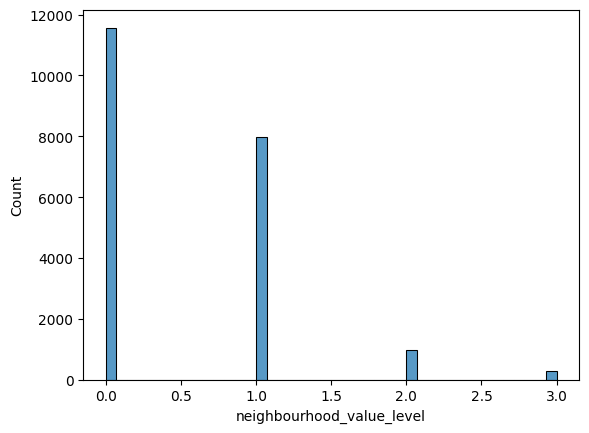

In [41]:
sns.histplot(data=df, x='neighbourhood_value_level')

In [42]:
columns = df.columns.drop(['date'])

I now want to review all the correlation coeffecients including the new variables to see which may be useful in a model.

In [43]:
correlations = [(column, df[column].corr(df['price'])) for column in columns]
correlations_sorted = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)

for column, corr_coeff in correlations_sorted:
    print(f"Correlation between {column} and price: {corr_coeff:.2f}")

Correlation between price and price: 1.00
Correlation between zip_avg_price and price: 0.70
Correlation between zip_price_per_room and price: 0.67
Correlation between grade_value and price: 0.67
Correlation between neighbourhood_value_level and price: 0.64
Correlation between grade and price: 0.63
Correlation between sqft_living and price: 0.62
Correlation between condition_value and price: 0.62
Correlation between grade_value_level and price: 0.62
Correlation between zip_price_per_sqft and price: 0.62
Correlation between price_per_sqft and price: 0.55
Correlation between diff_from_zip_avg_grade_value and price: 0.55
Correlation between sqft_living15 and price: 0.54
Correlation between grade_condition_score and price: 0.53
Correlation between diff_from_zip_avg_sqft and price: 0.52
Correlation between sqft_above and price: 0.51
Correlation between bathrooms and price: 0.45
Correlation between zip_avg_grade_value and price: 0.42
Correlation between total_rooms and price: 0.42
Correlation

I'm going to add all the variables with a corr.coef with over 0.5 into an OLS Regression to see how much they impact the overall data.

In [44]:
results = ols("price ~ zip_avg_price + zip_price_per_room + grade_value + neighbourhood_value_level + grade + sqft_living + condition_value + grade_value_level + zip_price_per_sqft + diff_from_zip_avg_grade_value + sqft_living15 + grade_condition_score + diff_from_zip_avg_sqft + sqft_above", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     5948.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:02:47   Log-Likelihood:            -2.7106e+05
No. Observations:               20763   AIC:                         5.421e+05
Df Residuals:                   20748   BIC:                         5.423e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

I want to play around with different variables more to see if I can improve the R-Squared

In [45]:
results = ols("price ~ + view + condition + grade + zipcode + renovated + basement + grade_value_level + neighbourhood_value_level + bedrooms + bathrooms + sqft_living + sqft_lot + floors + sqft_above + sqft_basement + yr_built + yr_renovated + lat + long + sqft_living15 + sqft_lot15 + grade_value + condition_value + grade_condition_score + sqft_per_floor + water_view_score + zip_avg_sqft + diff_from_zip_avg_sqft + zip_avg_grade_value + diff_from_zip_avg_grade_value + zip_price_per_sqft + zip_avg_price + total_rooms + zip_price_per_room ", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     3431.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:02:47   Log-Likelihood:            -2.6925e+05
No. Observations:               20763   AIC:                         5.386e+05
Df Residuals:                   20732   BIC:                         5.388e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

I want to review the distribution of all my new variables to see if there's any issues in their distribution.

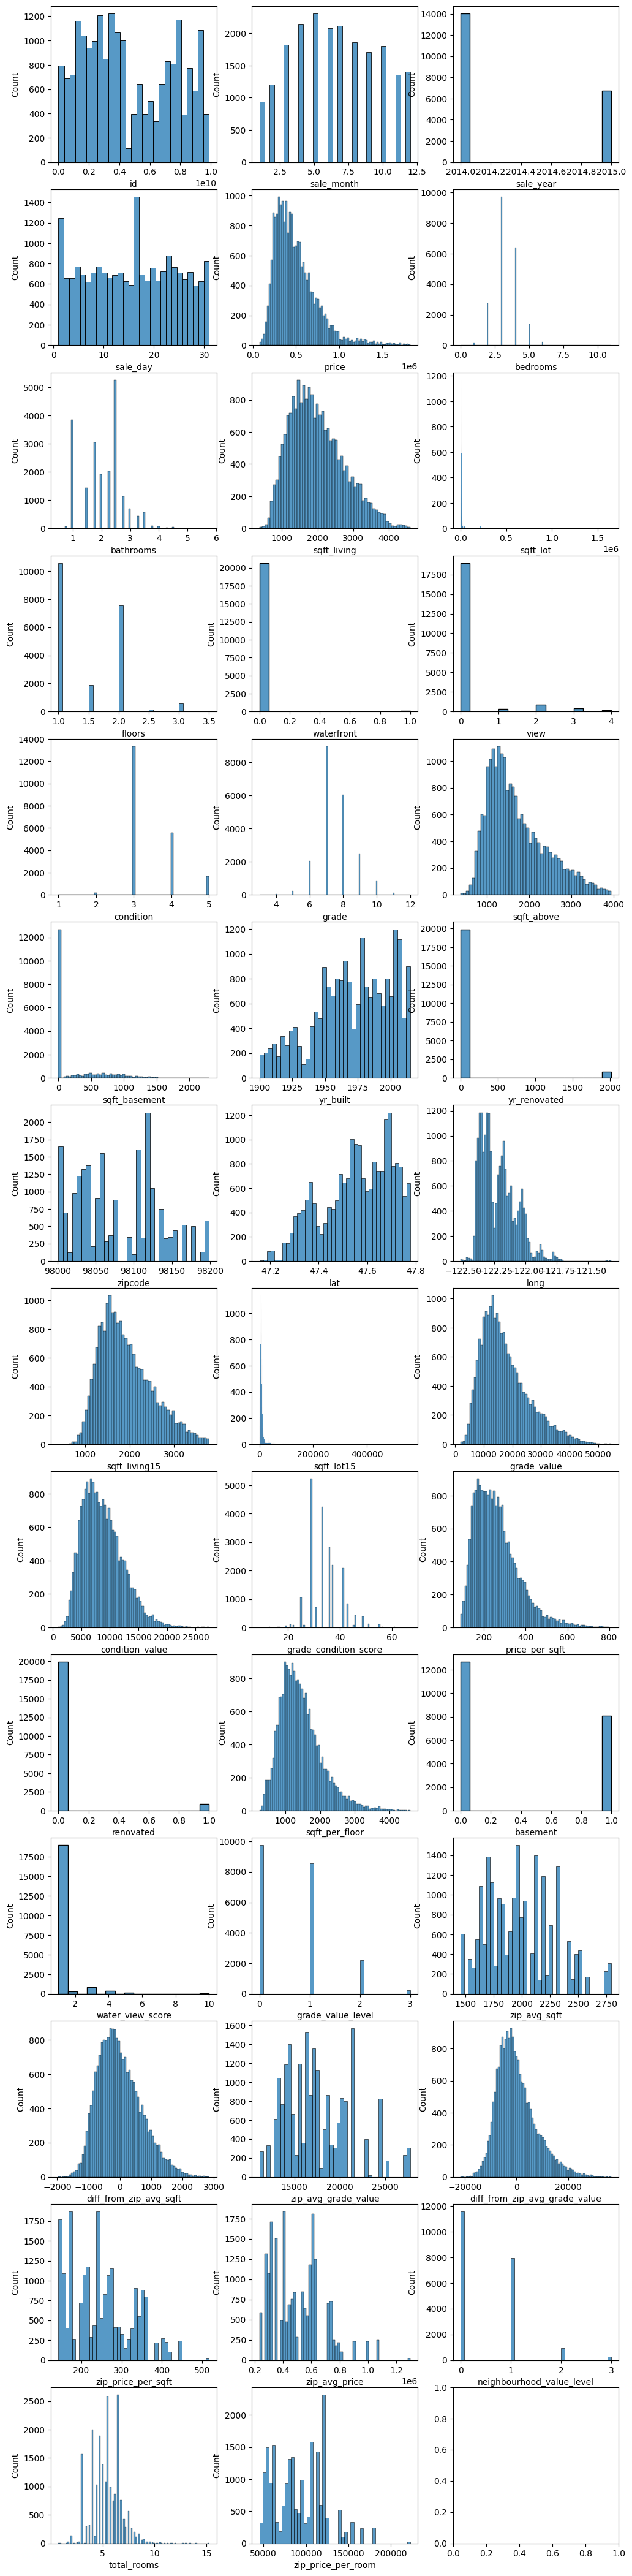

In [46]:
num_plots = len(columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))
fig.tight_layout()

for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.histplot(data=df, x=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.show()

I want to visualize the relationship between all the variables and the price, just to visually see which have strong relationships.

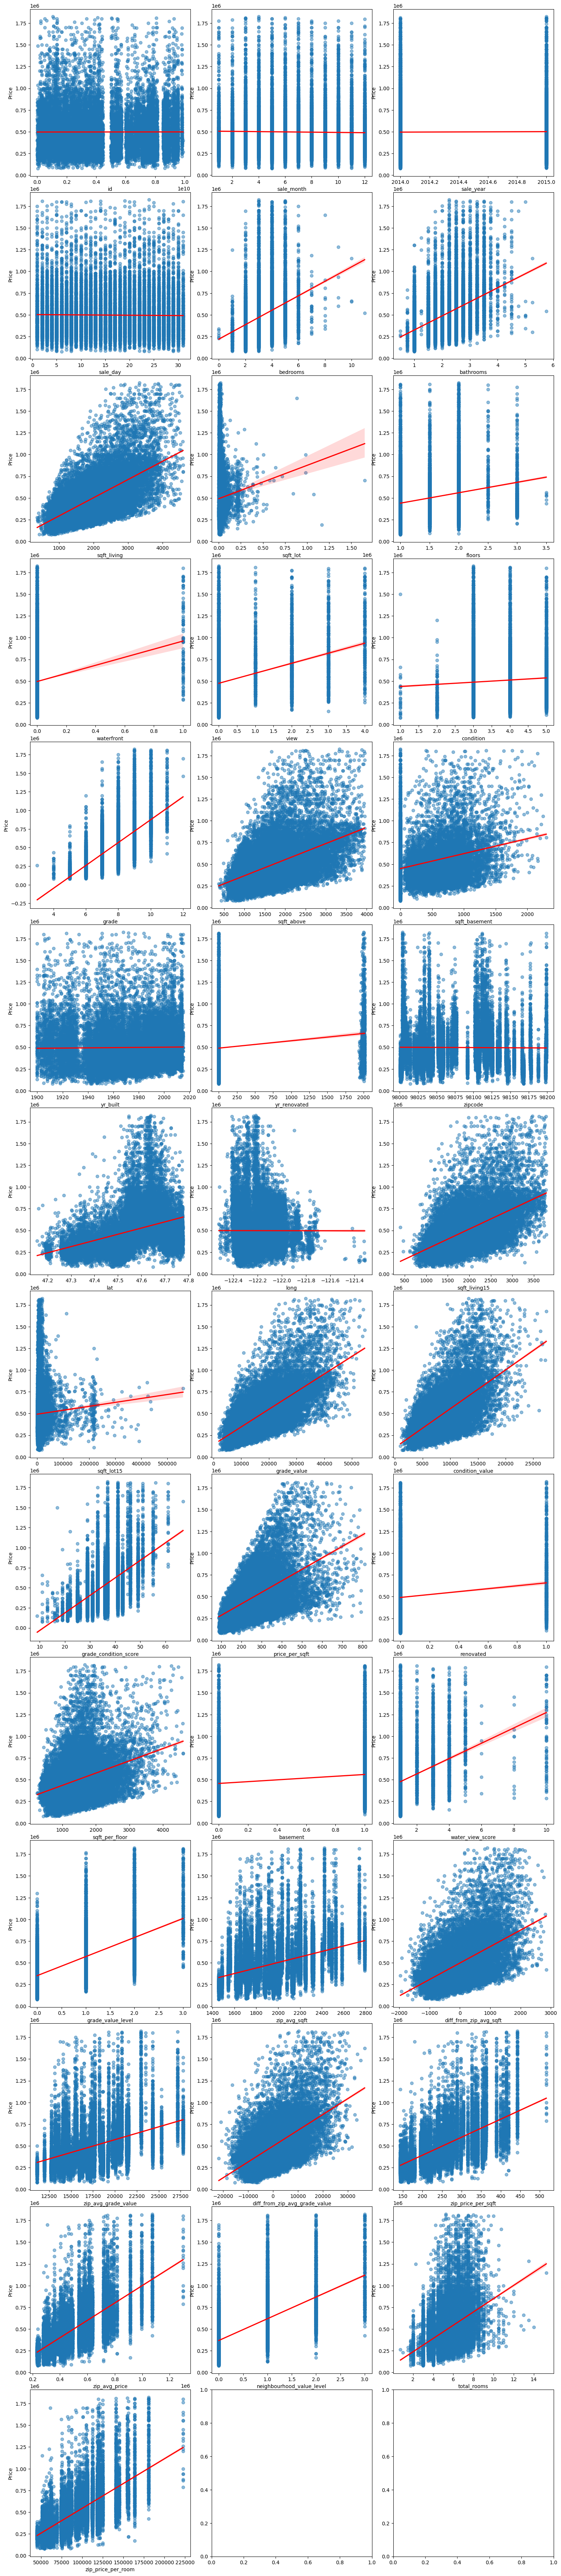

In [47]:
columns = df.columns.drop(['price', 'date'])

num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout()

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]  
    sns.regplot(x=column, y='price', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Price')


plt.show()

I want to calculate the r-squared value of the top 10 correlation variables to see how much they impact price.

In [48]:
X = df[['zip_avg_price','zip_price_per_room', 'grade_value', 'neighbourhood_value_level', 'grade', 'sqft_living', 'condition_value', 'grade_value_level', 'zip_price_per_sqft', 'diff_from_zip_avg_grade_value']]  # Replace 'variable_of_interest' with the name of the variable you want to analyze
y = df['price']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
r_squared = results.rsquared
print(f"R-squared for {X.columns[1]}: {r_squared:.2f}")

R-squared for zip_avg_price: 0.80


In [49]:
results = ols("price ~ sale_month + sale_year + sale_day + view + condition + grade + zipcode + renovated + basement + grade_value_level + neighbourhood_value_level + bedrooms + bathrooms + sqft_living + sqft_lot + floors + sqft_above + sqft_basement + yr_built + yr_renovated + lat + long + sqft_living15 + sqft_lot15 + grade_value + condition_value + grade_condition_score + sqft_per_floor + water_view_score + zip_avg_sqft + diff_from_zip_avg_sqft + zip_avg_grade_value + diff_from_zip_avg_grade_value + zip_price_per_sqft + zip_avg_price + total_rooms + zip_price_per_room ", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     3178.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:03:17   Log-Likelihood:            -2.6909e+05
No. Observations:               20763   AIC:                         5.382e+05
Df Residuals:                   20729   BIC:                         5.385e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

I'm going to use a combination of the variables with high correlation coeff and high t_scores w small p-values. I'm going to play around and see which variables work best.

I also want to ensure I can review how big the RMSE value is compared to the datasets mean and median price, so I will make those variables here to be used in later analysis.

In [50]:
price_mean = df['price'].mean()
price_median = df['price'].median()

I'll now begin setting up the models.

In [51]:
categorical_features = ['view', 'zipcode', 'renovated', 'basement']
numerical_features = ['zip_avg_price', 'zip_price_per_room', 'grade_value', 'neighbourhood_value_level', 'grade', 'sqft_living', 'sqft_lot', 'zip_price_per_sqft', 
                      'condition_value', 'grade_value_level', 'diff_from_zip_avg_grade_value', 'sqft_living15', 'grade_condition_score', 
                      'diff_from_zip_avg_sqft', 'sqft_above', 'bedrooms', 'bathrooms', 'floors', 'yr_built', 'yr_renovated', 'lat',
                      'sqft_per_floor','water_view_score', 'total_rooms', 'condition']


target = 'price'


In [52]:
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features],df[target], test_size = 0.3, random_state=1234)

With the dataset split, I want to review both the test and train data to be sure it's similar to eachother.

<Axes: xlabel='price', ylabel='Count'>

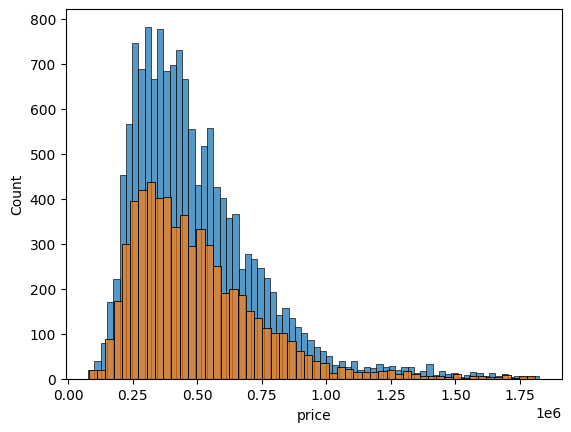

In [53]:
sns.histplot(y_train)
sns.histplot(y_test, alpha=0.7)

In [54]:
y_test.mean()

496844.3926794028

In [55]:
y_train.mean()

497518.12907664786

In [56]:
X_test.describe()

view       zipcode    renovated     basement  zip_avg_price   
count  6229.000000   6229.000000  6229.000000  6229.000000   6.229000e+03  \
mean      0.200032  98078.371970     0.041580     0.397335   4.970859e+05   
std       0.704007     53.612554     0.199643     0.489386   1.780203e+05   
min       0.000000  98001.000000     0.000000     0.000000   2.342840e+05   
25%       0.000000  98033.000000     0.000000     0.000000   3.556785e+05   
50%       0.000000  98065.000000     0.000000     0.000000   4.624800e+05   
75%       0.000000  98118.000000     0.000000     1.000000   6.118880e+05   
max       4.000000  98199.000000     1.000000     1.000000   1.297800e+06   

       zip_price_per_room   grade_value  neighbourhood_value_level   
count         6229.000000   6229.000000                6229.000000  \
mean         91624.770604  17564.648098                   0.511639   
std          30059.814237   8399.758746                   0.651859   
min          45352.648833   2100.000000                   0.000000   
25%          62380.221385  11430.000000                   0.000000   
50%          86988.524523  15760.000000                   0.000000   
75%         112783.420325  22050.000000                   1.000000   
max         222798.283262  54080.000000                   3.000000   

             grade  sqft_living  ...     bedrooms    bathrooms       floors   
count  6229.000000  6229.000000  ...  6229.000000  6229.000000  6229.000000  \
mean      7.557874  1989.440520  ...     3.350136     2.070798     1.477123   
std       1.033354   754.355081  ...     0.885311     0.705248     0.539540   
min       4.000000   420.000000  ...     0.000000     0.750000     1.000000   
25%       7.000000  1420.000000  ...     3.000000     1.500000     1.000000   
50%       7.000000  1890.000000  ...     3.000000     2.250000     1.000000   
75%       8.000000  2460.000000  ...     4.000000     2.500000     2.000000   
max      12.000000  4600.000000  ...    10.000000     5.750000     3.500000   

          yr_built  yr_renovated          lat  sqft_per_floor   
count  6229.000000   6229.000000  6229.000000     6229.000000  \
mean   1971.052817     82.961310    47.557437     1454.844901   
std      28.776980    398.347882     0.140371      618.410595   
min    1900.000000      0.000000    47.164700      253.333333   
25%    1952.000000      0.000000    47.461200     1020.000000   
50%    1974.000000      0.000000    47.568800     1350.000000   
75%    1996.000000      0.000000    47.678700     1770.000000   
max    2015.000000   2015.000000    47.777200     4600.000000   

       water_view_score  total_rooms    condition  
count       6229.000000  6229.000000  6229.000000  
mean           1.215926     5.420934     3.409697  
std            0.832907     1.379510     0.645678  
min            1.000000     1.750000     1.000000  
25%            1.000000     4.500000     3.000000  
50%            1.000000     5.500000     3.000000  
75%            1.000000     6.500000     4.000000  
max           10.000000    15.250000     5.000000  

[8 rows x 29 columns]

In [57]:
X_train.describe()

view       zipcode     renovated      basement  zip_avg_price   
count  14534.000000  14534.000000  14534.000000  14534.000000   1.453400e+04  \
mean       0.197468  98079.111119      0.041351      0.386198   4.974146e+05   
std        0.694379     53.649018      0.199108      0.486894   1.757873e+05   
min        0.000000  98001.000000      0.000000      0.000000   2.342840e+05   
25%        0.000000  98033.000000      0.000000      0.000000   3.556785e+05   
50%        0.000000  98070.000000      0.000000      0.000000   4.669525e+05   
75%        0.000000  98118.000000      0.000000      1.000000   6.118880e+05   
max        4.000000  98199.000000      1.000000      1.000000   1.297800e+06   

       zip_price_per_room   grade_value  neighbourhood_value_level   
count        14534.000000  14534.000000               14534.000000  \
mean         91967.700464  17431.994220                   0.515825   
std          29915.847727   8387.862394                   0.645627   
min          45352.648833   1920.000000                   0.000000   
25%          62380.221385  11280.000000                   0.000000   
50%          86988.524523  15660.000000                   0.000000   
75%         113193.082927  21960.000000                   1.000000   
max         222798.283262  54600.000000                   3.000000   

              grade   sqft_living  ...      bedrooms     bathrooms   
count  14534.000000  14534.000000  ...  14534.000000  14534.000000  \
mean       7.544379   1975.097977  ...      3.326613      2.051569   
std        1.042643    752.250463  ...      0.889187      0.704449   
min        3.000000    370.000000  ...      0.000000      0.500000   
25%        7.000000   1400.000000  ...      3.000000      1.500000   
50%        7.000000   1860.000000  ...      3.000000      2.000000   
75%        8.000000   2460.000000  ...      4.000000      2.500000   
max       12.000000   4600.000000  ...     11.000000      5.250000   

             floors      yr_built  yr_renovated           lat  sqft_per_floor   
count  14534.000000  14534.000000  14534.000000  14534.000000    14534.000000  \
mean       1.477467   1970.001582     82.541971     47.559097     1438.733649   
std        0.537673     29.493407    397.455490      0.139742      601.330605   
min        1.000000   1900.000000      0.000000     47.155900      273.333333   
25%        1.000000   1950.000000      0.000000     47.466300     1010.000000   
50%        1.000000   1973.000000      0.000000     47.570500     1340.000000   
75%        2.000000   1995.000000      0.000000     47.678900     1760.000000   
max        3.500000   2015.000000   2015.000000     47.777600     4600.000000   

       water_view_score   total_rooms     condition  
count      14534.000000  14534.000000  14534.000000  
mean           1.222719      5.378182      3.417022  
std            0.883422      1.383717      0.655232  
min            1.000000      0.750000      1.000000  
25%            1.000000      4.500000      3.000000  
50%            1.000000      5.500000      3.000000  
75%            1.000000      6.500000      4.000000  
max           10.000000     14.000000      5.000000  

[8 rows x 29 columns]

Reviewing both the training and the test data after the split, I see no major differences between the two, leading me to believe that the model be trained on data that is representative of the dataset as a whole, which is great. We can continue.

I'll now create the pipeline for both the categorical and numerical variables, adding onehotencoder and standard scaling, as well as simpleimputer.

In [58]:
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean'))])

Create the preprocessor

In [59]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, categorical_features),
    ('num', num_transformer, numerical_features)])

I'm going to build the models, calculating RMSE , R2 score, creating a quantile_loss function that will show the accuracy of the predictions based on quartile values, and finally showing the ratio of RMSE to price mean and median.

In [60]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
linear_regression.fit(X_train, y_train)
linear_pred = linear_regression.predict(X_test)
print(linear_pred)

rmse = np.sqrt(mean_squared_error(linear_pred,y_test))

print("Linear RMSE: ", rmse)

r2 = r2_score(y_test, linear_pred)
print("R-squared (R^2):", r2)

def quantile_loss(y_test, linear_pred, q):
    residual = y_test - linear_pred
    loss = np.where(residual >= 0, q * residual, (q - 1) * residual)
    return np.mean(loss)

quantiles = [0.99, 0.95, 0.9, 0.5]

for quantile in quantiles:
    loss = quantile_loss(y_test, linear_pred, quantile)
    print(f"Quantile Loss ({quantile}): {loss}")

print("RMSE to Mean Price Ratio: ", (rmse/price_mean))
print("RMSE to Median Price Ratio: ", (rmse/price_median))

[250285.51955654 450790.5806348  702471.35244827 ... 242160.73107578
 421979.53643935 393149.90904379]
Linear RMSE:  100919.11721523141
R-squared (R^2): 0.8401034400414765
Quantile Loss (0.99): 35124.958637424395
Quantile Loss (0.95): 35101.65803880026
Quantile Loss (0.9): 35072.5322905201
Quantile Loss (0.5): 34839.52630427878
RMSE to Mean Price Ratio:  0.20292754751170805
RMSE to Median Price Ratio:  0.22936163003461685


I want to plot the residuals to see how the model is performing. 

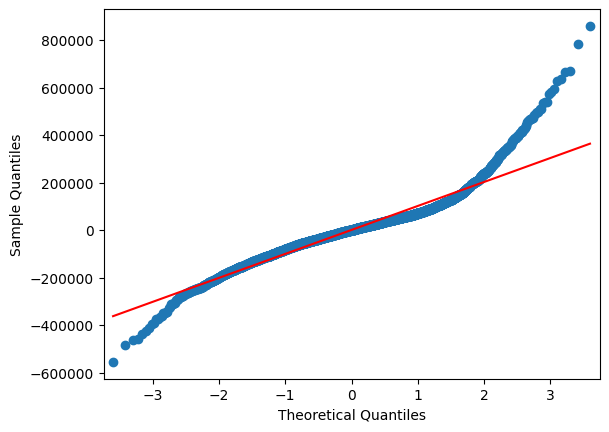

In [61]:
residuals = y_test - linear_pred
sm.qqplot(residuals, line='s')
plt.show()

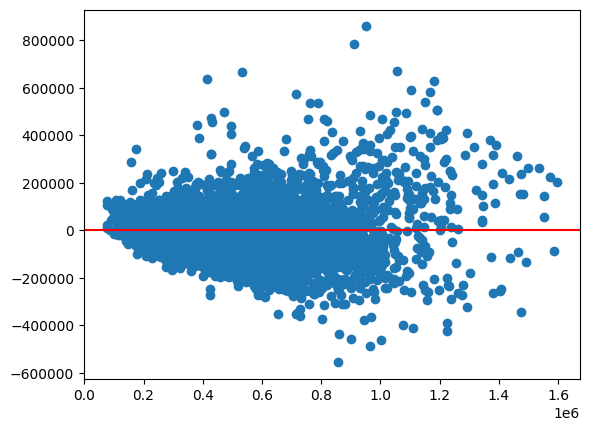

In [62]:
residuals = y_test - linear_pred
plt.scatter(linear_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

I want to plot the distribution of both the actual test data and the prediction values to see if the model is similar to the actual values.

<Axes: xlabel='price', ylabel='Count'>

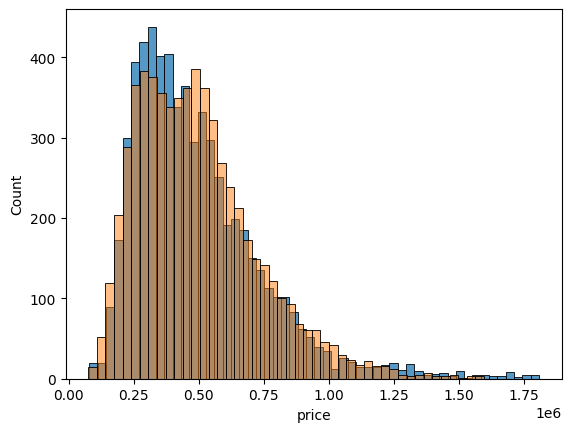

In [63]:
sns.histplot(y_test)
sns.histplot(linear_pred, alpha=0.5)

I will now do the same with the other models, but I also want to try out different parameters to find which ones work best. To do this, I'll make a list of alpha values to pass into a loop, and then have that loop check if the rmse given of each alpha is lower than the last, saving the lowest each time. By the end, the alpha giving the lowest RMSE will be returned. I will do this for the next two models.

In [64]:
ridge_alphas = [0.1, 1.0, 3.0, 5.0, 7.0, 9.0, 10.0] 

best_rmse = float('inf') 
best_alpha = None 

for alpha in ridge_alphas:
  
    ridge_regression = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=alpha))
    ])

    ridge_regression.fit(X_train, y_train)

    ridge_pred = ridge_regression.predict(X_test)

    rmse = np.sqrt(mean_squared_error(ridge_pred, y_test))

    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha

print("Best Ridge Alpha:", best_alpha)
print("Best Rudge RMSE:", best_rmse)

r2 = r2_score(y_test, ridge_pred)
print("R-squared (R^2):", r2)


def quantile_loss(y_test, ridge_pred, q):
    residual = y_test - ridge_pred
    loss = np.where(residual >= 0, q * residual, (q - 1) * residual)
    return np.mean(loss)

quantiles = [0.99, 0.95, 0.9, 0.5]

for quantile in quantiles:
    loss = quantile_loss(y_test, ridge_pred, quantile)
    print(f"Quantile Loss ({quantile}): {loss}")


print("RMSE to Mean Price Ratio: ", (best_rmse/price_mean))
print("RMSE to Median Price Ratio: ", (best_rmse/price_median))

Best Ridge Alpha: 3.0
Best Rudge RMSE: 101162.33370852483
R-squared (R^2): 0.8393001857813629
Quantile Loss (0.99): 35144.32725336549
Quantile Loss (0.95): 35126.76325285126
Quantile Loss (0.9): 35104.80825220848
Quantile Loss (0.5): 34929.168247066234
RMSE to Mean Price Ratio:  0.20341660575815676
RMSE to Median Price Ratio:  0.2299143947921019


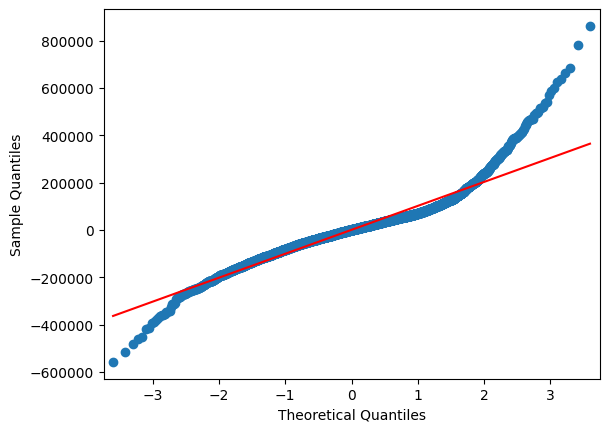

In [65]:
residuals = y_test - ridge_pred
sm.qqplot(residuals, line='s')
plt.show()

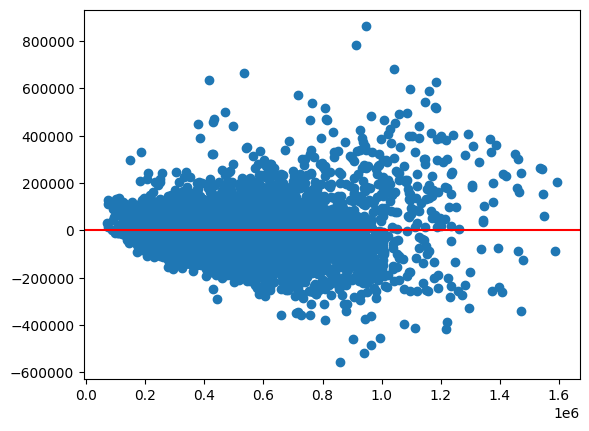

In [66]:
residuals = y_test - ridge_pred

plt.scatter(ridge_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')

plt.show()

<Axes: xlabel='price', ylabel='Count'>

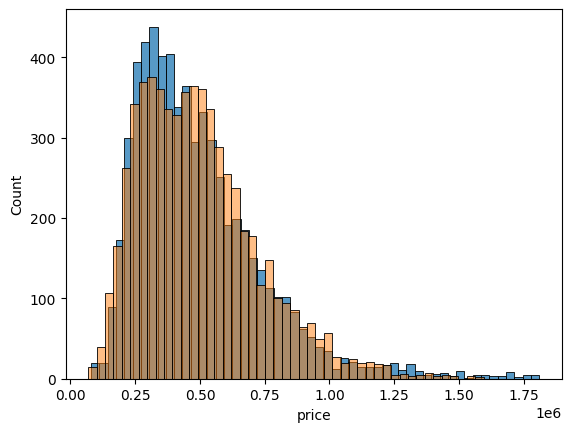

In [67]:
sns.histplot(y_test)
sns.histplot(ridge_pred, alpha=0.5)

In [68]:
lasso_alphas = [0.1, 1.0, 3.0, 5.0, 7.0, 9.0, 10.0] 

best_rmse = float('inf') 
best_alpha = None 

for alpha in lasso_alphas:
  
    lasso_regression = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', Lasso(alpha=alpha))
    ])

    lasso_regression.fit(X_train, y_train)

    lasso_pred = lasso_regression.predict(X_test)

    rmse = np.sqrt(mean_squared_error(lasso_pred, y_test))

    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha

print("Best Lasso Alpha:", best_alpha)
print("Best Lasso RMSE:", best_rmse)

r2 = r2_score(y_test, lasso_pred)
print("R-squared (R^2):", r2)

def quantile_loss(y_test, lasso_pred, q):
    residual = y_test - lasso_pred
    loss = np.where(residual >= 0, q * residual, (q - 1) * residual)
    return np.mean(loss)

quantiles = [0.99, 0.95, 0.9, 0.5]

for quantile in quantiles:
    loss = quantile_loss(y_test, lasso_pred, quantile)
    print(f"Quantile Loss ({quantile}): {loss}")

print("RMSE to Mean Price Ratio: ", (best_rmse/price_mean))
print("RMSE to Median Price Ratio: ", (best_rmse/price_median))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77478065070920.0, tolerance: 93416190239.5739
  model = cd_fast.sparse_enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68912428004168.68, tolerance: 93416190239.5739
  model = cd_fast.sparse_enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69967375035119.875, tolerance: 93416190239.5739
  model = cd_fast.sparse_enet_

Best Lasso Alpha: 0.1
Best Lasso RMSE: 101137.96152961206
R-squared (R^2): 0.8392859331426488
Quantile Loss (0.99): 35155.29823716963
Quantile Loss (0.95): 35137.21485849521
Quantile Loss (0.9): 35114.61063515219
Quantile Loss (0.5): 34933.77684840799
RMSE to Mean Price Ratio:  0.20336759832893264
RMSE to Median Price Ratio:  0.22985900347639104


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38709419010344.445, tolerance: 93416190239.5739
  model = cd_fast.sparse_enet_coordinate_descent(


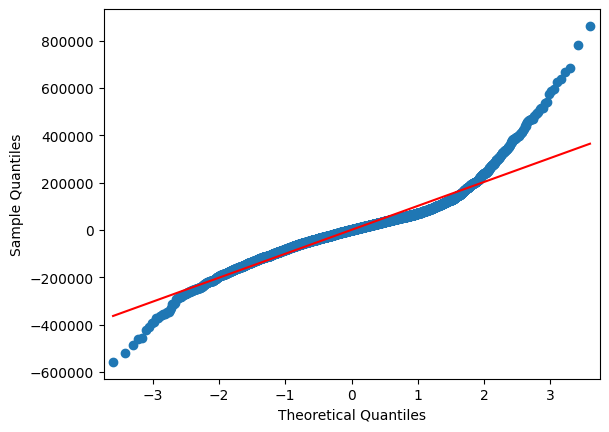

In [69]:
residuals = y_test - lasso_pred
sm.qqplot(residuals, line='s')
plt.show()

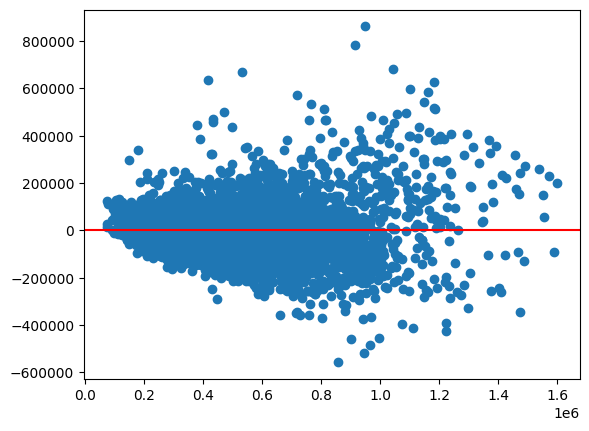

In [70]:
residuals = y_test - lasso_pred

plt.scatter(lasso_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')

plt.show()

<Axes: xlabel='price', ylabel='Count'>

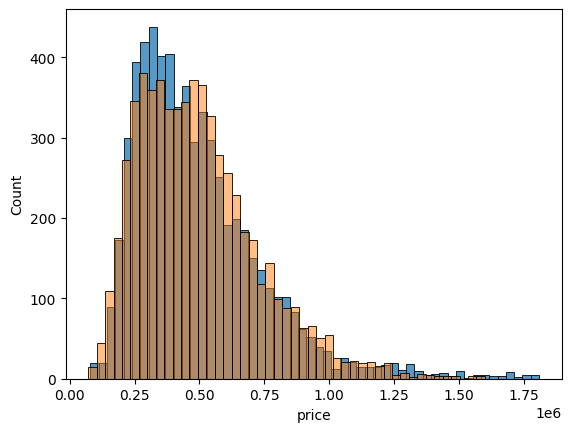

In [71]:
sns.histplot(y_test)
sns.histplot(lasso_pred, alpha=0.5)

For elasticnet I will do a similar thing, but also add the L1/L2 ratio amounts to try the combination of those to get the best RMSE as well.

In [72]:
elasticnet_alphas = [0.1, 1.0, 3.0, 5.0, 7.0, 9.0, 10.0] 
elasticnet_l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9] 

best_rmse = float('inf') 
best_alpha = None 
best_l1_ratio = None

for alpha in elasticnet_alphas:
    for l1_ratio in elasticnet_l1_ratios:
        elasticnet_regression = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', ElasticNet(alpha=alpha, l1_ratio=l1_ratio))
        ])

        elasticnet_regression.fit(X_train, y_train)

        elasticnet_pred = elasticnet_regression.predict(X_test)

        rmse = np.sqrt(mean_squared_error(elasticnet_pred, y_test))

        if rmse < best_rmse:
            best_rmse = rmse
            best_alpha = alpha
            best_l1_ratio = l1_ratio


r2 = r2_score(y_test, elasticnet_pred)
print("R-squared (R^2):", r2)

def quantile_loss(y_test, elasticnet_pred, q):
    residual = y_test - elasticnet_pred
    loss = np.where(residual >= 0, q * residual, (q - 1) * residual)
    return np.mean(loss)

quantiles = [0.99, 0.95, 0.9, 0.5]

for quantile in quantiles:
    loss = quantile_loss(y_test, elasticnet_pred, quantile)
    print(f"Quantile Loss ({quantile}): {loss}")

print("Best Elasticnet Alpha:", best_alpha)
print("Best Elasticnet L1 Ratio:", best_l1_ratio)
print("Best Elasticnet RMSE:", best_rmse)

print("RMSE to Mean Price Ratio: ", (best_rmse/price_mean))
print("RMSE to Median Price Ratio: ", (best_rmse/price_median))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12572295162460.422, tolerance: 93416190239.5739
  model = cd_fast.sparse_enet_coordinate_descent(


R-squared (R^2): 0.8029990783924061
Quantile Loss (0.99): 36665.276907289925
Quantile Loss (0.95): 36706.525766941704
Quantile Loss (0.9): 36758.08684150643
Quantile Loss (0.5): 37170.575438024265
Best Elasticnet Alpha: 0.1
Best Elasticnet L1 Ratio: 0.9
Best Elasticnet RMSE: 101734.21117203459
RMSE to Mean Price Ratio:  0.20456653348592066
RMSE to Median Price Ratio:  0.2312141163000786


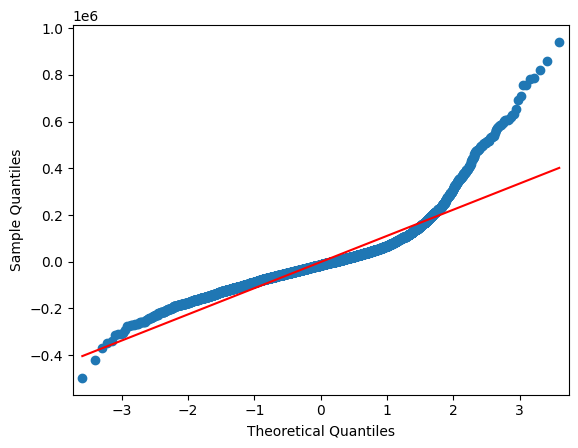

In [73]:
residuals = y_test - elasticnet_pred
sm.qqplot(residuals, line='s')
plt.show()

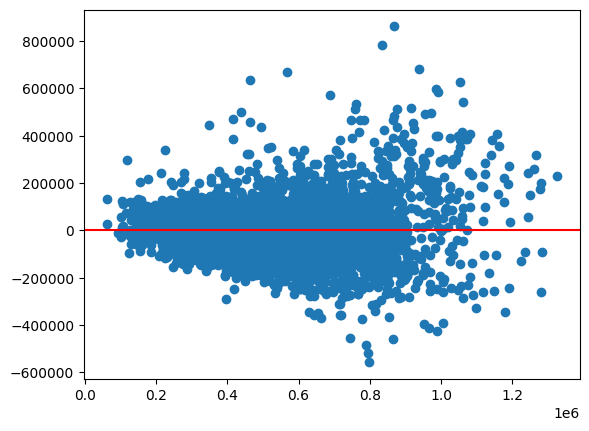

In [74]:
residuals = y_test - lasso_pred

plt.scatter(elasticnet_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')

plt.show()

<Axes: xlabel='price', ylabel='Count'>

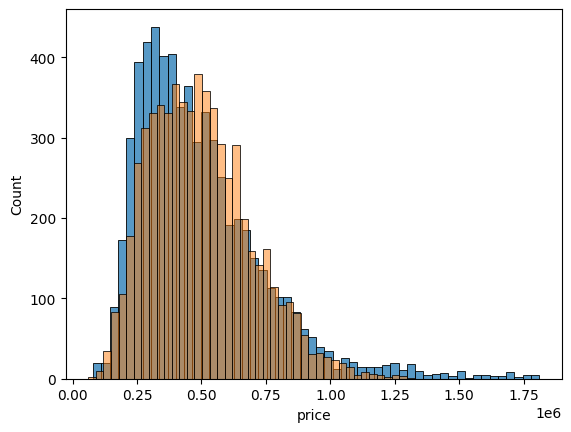

In [75]:
sns.histplot(y_test)
sns.histplot(elasticnet_pred, alpha=0.5)

In [76]:
df.describe()

id                           date    sale_month   
count  2.076300e+04                          20763  20763.000000  \
mean   4.597590e+09  2014-10-29 11:21:20.104031232      6.572123   
min    1.000102e+06            2014-05-02 00:00:00      1.000000   
25%    2.126049e+09            2014-07-22 00:00:00      4.000000   
50%    3.905060e+09            2014-10-16 00:00:00      6.000000   
75%    7.336700e+09            2015-02-18 00:00:00      9.000000   
max    9.900000e+09            2015-05-27 00:00:00     12.000000   
std    2.878705e+09                            NaN      3.117074   

          sale_year      sale_day         price     bedrooms     bathrooms   
count  20763.000000  20763.000000  2.076300e+04  20763.00000  20763.000000  \
mean    2014.323893     15.694890  4.973160e+05      3.33367      2.057338   
min     2014.000000      1.000000  7.800000e+04      0.00000      0.500000   
25%     2014.000000      8.000000  3.170000e+05      3.00000      1.500000   
50%     2014.000000     16.000000  4.400000e+05      3.00000      2.250000   
75%     2015.000000     23.000000  6.150000e+05      4.00000      2.500000   
max     2015.000000     31.000000  1.824100e+06     11.00000      5.750000   
std        0.467971      8.627116  2.531872e+05      0.88807      0.704727   

        sqft_living      sqft_lot  ...  grade_value_level  zip_avg_sqft   
count  20763.000000  2.076300e+04  ...       20763.000000  20763.000000  \
mean    1979.400809  1.408196e+04  ...           0.659924   1979.400809   
min      370.000000  5.200000e+02  ...           0.000000   1457.537313   
25%     1406.500000  5.000000e+03  ...           0.000000   1738.892157   
50%     1870.000000  7.500000e+03  ...           1.000000   1954.047882   
75%     2460.000000  1.026000e+04  ...           1.000000   2187.928803   
max     4600.000000  1.651359e+06  ...           3.000000   2791.591503   
std      752.892995  3.821659e+04  ...           0.711545    298.033146   

       diff_from_zip_avg_sqft  zip_avg_grade_value   
count            2.076300e+04         20763.000000  \
mean             1.038146e-14         17471.791022   
min             -1.959564e+03         11145.074627   
25%             -5.120398e+02         14510.933941   
50%             -9.154039e+01         16858.018416   
75%              4.295510e+02         19860.000000   
max              2.852116e+03         27777.581699   
std              6.913929e+02          3581.719619   

       diff_from_zip_avg_grade_value  zip_price_per_sqft  zip_avg_price   
count                   2.076300e+04        20763.000000   2.076300e+04  \
mean                    2.838475e-14          250.144369   4.973160e+05   
min                    -2.167804e+04          143.701558   2.342840e+05   
25%                    -5.386117e+03          179.807078   3.556785e+05   
50%                    -1.308363e+03          241.268549   4.624800e+05   
75%                     4.117847e+03          298.542519   6.118880e+05   
max                     3.674341e+04          516.742982   1.297800e+06   
std                     7.588658e+03           75.401942   1.764559e+05   

       neighbourhood_value_level   total_rooms  zip_price_per_room  
count               20763.000000  20763.000000        20763.000000  
mean                    0.514569      5.391008        91864.819854  
min                     0.000000      0.750000        45352.648833  
25%                     0.000000      4.500000        62380.221385  
50%                     0.000000      5.500000        86988.524523  
75%                     1.000000      6.500000       113193.082927  
max                     3.000000     15.250000       222798.283262  
std                     0.647490      1.382562        29958.798937  

[8 rows x 42 columns]

1. Build a regression model to predict the price of a house. You may choose between Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net.

You may need to clean and transform the data, including feature engineering, creating dummy variables, or using dimensionality reduction.
Be sure to explain why you chose the approach you did, and why it's the best approach for the data provided.

Data cleaning & transformation:

For this dataset, there wasn't much in terms of data cleaning that was needed (null values, duplicates, incorrect datatypes, incorrect entries, etc). However, many key columns such as price and sqft based columns had strong right skewness. Because regression models tend to perform better when the data is normally distributed, I wanted to improve the distribution of these variables. All of them tended to have extremely long tails at the high end, so I performed z-score analysis to determine the outliers and remove them. For the feature variables, I chose a Z-Score of 3 when removing, since this didn't impact the overall data or our target price variable all that much. With the price variable, I wanted to be less aggressive when removing the outliers, as I didn't want to narrow the price range of the data too much as this would also be directly narrowing down the prices that the model would be able to work with. I played around with various z-scores for this, and determined a z-score of 3 made the price data range too narrow for my liking (topping out at $1.4 million), and a z-score of 4 made the models accuracy too low (RMSE's of 110,000 +), so I settled on a z-score of 3.5, which provided me with models with accuracy around 100,000 RMSE, and maintained an upper price limit of  $1.824 million, a good middle ground. Additionally, I incorporated data imputation into the model pipeline to fill any potential missing values with the respective mean. 

Feature Engineering:

I carried out extensive feature engineering for this dataset in hopes of creating variables that would help the model perform better. One of the key features that significantly boosted the model performances was the average price per squarefoot per zipcode. I wanted to find ways to incorporate price data without needing to know our specific houses price when predicting. By grouping the dataset by zipcode, finding the average price of a house per those zipcodes, as well as the average sqft_living of houses in that zipcode, I was able to create a price per squarefoot column that could be utilized in predictions, helping the models significantly. 

Throughout the exploration of the data, I found that zipcode values on their own didn't provide much insight for predicting house prices, however, the averages of many key variables grouped by zip-code provided many great insights. These included things like zipcode average price, zipcode average price per room and neighbourhood value level (levels based on avg price per zipcode). Additionally, I found that comparative values of some key metrics like sqft_living compared to the average sqft_living per house in the zipcode, and house grade value (determined by multiplying the house grade by sqft_living) compared to the average house grade value in that zipcode often provided very good insights. This tells us that not only is the area important for house price, but buyers also care how their price compares to other houses in their area.

Dummy Variables:

Some dummy variables were created for things like if a house has a basement, or if a house has been renovated. These were some additional categorical features that could be utilized by the models.

Dimensionality reduction:

Lots of trial and error, as well as correllation coeffecient, t-score, and p-value analysis was done on the dataset to review which variables would be more useful for the models than others. I did not want to include every variable in the models to ensure it remained effecient and effective. This allowed me to eliminate features from the model that did not provide much benefit. Additionally, I chose to create new variables through the combination of other variables to perserve the variation impact without relying on more variables then needed. Finally, I integrated into the model pipeline standard scaling to scale any numerical data if required and one hot encoding to convert any potential categorical values into numerical representations if it ended up being needed. I chose not to do more intense dimensionality reduction such as PCA, as I wanted to retain the variable data so I could ensure I knew specifically which variables were impacting the price of houses and what was being used in the model.  
         

2. Evaluate the model using techniques covered in class and explain the results. How do you know this is the best model you can build, given the tools you have?

I chose to build all 4 models to review how each performed on the dataset. The main criteria I used to review the effectiveness of the models we're RMSE, R Squared, Quantile loss test, plotting residuals, and plotting the distribution of test and prediction values. I also utilized multiple parameter inputs for applicable models to find which parameter values provide the lowest RMSE value. 

Having done these reviews, most models tend to perform relatively similarily when predicting prices; with RMSE's between 100,000 and 102,000 (representing roughly 20.3% to 20.5% of the dataset mean price) and R Squared values between 0.80 and 0.84.  Finally, when reviewing performance based on data quartiles, we can see that at the mean of the data, most models miss predictions by 35,000 units on average, and on the outer 1% of data, most models miss by roughly 35,200 - relatively similar performance. 

When reviewing the residual graphs of all models; linear, ridge and lasso models all predict very accurately between -2 and +2 data quartiles, and tend to under-predict values at the low-end extremes, and over-predict at the high end extremes. Elasticnet on the other hand tends to predict quite accurately at the low end up until the +2 quartile, and then tends to significantly over-predict on the high end of the data. Although visually it appears to be more accurate, the over-prediction on the high-end makes the model less accurate according to my other performance metrics.

Because of this; I would recommend going forward with the linear regression model. This model tends to be a little more straightforward and faster than the other models. It had the best values in all of my performance metrics. However, the margins of these performance improvements are slim, and thus any model would perform relatively similarily under similar conditions. 

It should be noted that the price data range was kept wide intentionally, as I wanted the model to have seen prices on the higher range, allowing it to be used for a wider range of houses in the market. However, improvements to accuracy can easily be made by shrinking the range of price data in the data set by lowering the z_score when taking out outliers. If the houses being looked at for predictions tend to be in a lower, smaller range of prices, then this z-score can be updated to improve the model prediction.



3. Explain the results to a business executive. What are the main drivers of house prices in King City? And how much do these drivers impact the price?

When it comes to drivers and their direct impact on house price, we've found that the following 10 variables had the highest direct correlation to king county house prices:
Average home price per zip code, average price per room per zip code, houses grade value (the product of a house grade scale and their squarefoot living space), neighbourhood value level (based on average price per zipcode), total squarefoot of living space, condition value (product of condition and squarefeet of living space), average price per squarefeet per zipcode, the difference between a houses grade value and the average grade value of houses in their zipcode, and a houses waterfront+view score (product of (1+waterfront) and (1+view) values). These 10 variables account for approximately 80% of the variability in house price (with a combines r-squared value of 0.8). These values would be very beneficial to include when trying to accurately predict house prices in the future. These are just 10 of the variables, however there are additional useful variables that can be included for increased accuracy, such as bedrooms, bathrooms, floors, view, lat, basement and condition.